<h1>Лабораторная работа 5</h1>
<h2>Градиентный бустинг с Catboost</h2>

Выполнил: 6131 Чаплыгин Алексей Олегович

Туториал по использованию библиотеки CatBoost: https://github.com/catboost/tutorials/blob/master/ru/ml_session_2018_tutorial_ru.ipynb

Мастер-класс от Яндекса по CatBoost классификации: https://www.youtube.com/watch?v=xl1fwCza9C8

Установка билиотек:

`
!pip3 install catboost shap ipywidgets
!jupyter nbextension enable --py widgetsnbextension
`

0 Подобрать набор данных для классификации (количество классов не имеет значения) и регрессии. Важно наличие числовых и категориальных признаков в данных. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. Можно работать на тех же данных, что и в предыдущей Л.Р.: в этом случае сравнить с результатами лучшего классификатора из предыдущей работы.

1  Применить классификатор `CatBoostClassifier` к вашему набору данных. Обратите внимание, что catboost умеет работать с категориальными признаками (параметр `cat_features` - список индексов категориальных признаков), поэтому использование `pd.factorize / pd.get_dummies` здесь лишнее.    
- Вывести итерацию с наилучшим значением AUC (для бинарной классификации) или наилучшим значением Logloss.
- Вывести значения метрик качества классификации на тестовых данных (accuracy и precision / recall / AUC, если применимо).
- В случае бинарной классификации на основе CatBoostClassifier построить кривые PRC и ROC. Вычислить значения PRC-AUC и ROC-AUC.


Примеры классификатора и построения ROC-кривой: https://github.com/catboost/tutorials/blob/master/classification/classification_tutorial.ipynb

2 Применить регрессию `CatBoostRegressor` к набору данных для регрессии. Вывести номер итерации и значения метрик (MAE и MSE) для наилучшей итерации. Обратите внимание, что в задаче восстановления регрессии целевая переменная имеет непрерывные значения. 

In [1]:
# PRE INIT ROW
# for new libraries if need
# !pip install

In [2]:
#!pip install catboost

In [3]:
#!pip install catboost shap ipywidgets

In [4]:
#!jupyter nbextension enable --py widgetsnbextension

In [5]:
# INIT IMPORT
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error

import catboost
from catboost import *
from catboost import datasets
from catboost import CatBoostClassifier

<h2>0. Набор данных</h2>
Выберите набор данных для классификации (бинарной или многоклассовой — не важно). Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных. В общем, проведите "визуальный" анализ ваших данных.</br>
Используемый в работе набор данных "White Wine Quality" доступен по следующей ссылке:https://www.kaggle.com/datasets/piyushagni5/white-wine-quality и содержит два набора данных относятся к красному и белому вариантам португальского вина "Vinho Verde". Для получения более подробной информации обратитесь к [Cortez et al., 2009]. Из-за конфиденциальности и логистических проблем доступны только физико-химические (входные данные) и сенсорные (выходные данные) переменные (например, нет данных о сортах винограда, марке вина, отпускной цене вина и т.д.).
В наборе данных содержится таблица с 12 столбцами.</br>
<table border="1">
   <caption>White Wine Quality</caption>
   <tr>
    <th>Номер столбца</th>
    <th>Название столбца</th>
    <th>Описание столбца</th>
   </tr>
   <tr><td>1</td><td>fixed acidity</td><td>Фиксированная кислотность</td></tr>
   <tr><td>2</td><td>volatile acidity</td><td>Летучая кислотность</td></tr>
   <tr><td>3</td><td>citric acid</td><td>Лимонная кислота</td></tr>
   <tr><td>4</td><td>residual sugar</td><td>Остаточный сахар</td></tr>
   <tr><td>5</td><td>chlorides</td><td>Хлориды</td></tr>
   <tr><td>6</td><td>free sulfur dioxide</td><td>Свободный диоксид серы</td></tr>
   <tr><td>7</td><td>total sulfur dioxide</td><td>Общий диоксид серы</td></tr>
   <tr><td>8</td><td>density</td><td>Плотность</td></tr>
   <tr><td>9</td><td>pH</td><td>pH</td></tr>
   <tr><td>10</td><td>sulphates</td><td>Сульфаты</td></tr>
   <tr><td>11</td><td>alcohol</td><td>Алкоголь</td></tr>
   <tr><td>12</td><td>quality</td><td>Качество (оценка от 0 до 10)</td></tr>
  </table>

In [6]:
df = pd.read_csv('data/winequality-white.csv', sep = ';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [7]:
# Преобразуем в целые (чтобы можно было с ними работать, как с категориальными)

df['fixed acidity'] = df['fixed acidity'].apply(lambda val: int(val*10))
df['volatile acidity'] = df['volatile acidity'].apply(lambda val: int(val*100))
df['citric acid'] = df['citric acid'].apply(lambda val: int(val*100))
df['residual sugar'] = df['residual sugar'].apply(lambda val: int(val*10))
df['chlorides'] = df['chlorides'].apply(lambda val: int(val*1000))
df['total sulfur dioxide'] = df['total sulfur dioxide'].apply(lambda val: int(val))
df['free sulfur dioxide'] = df['free sulfur dioxide'].apply(lambda val: int(val))
df['density'] = df['density'].apply(lambda val: int(val*10000))
df['pH'] = df['pH'].apply(lambda val: int(val*100))
df['sulphates'] = df['sulphates'].apply(lambda val: int(val*100))
df['alcohol'] = df['alcohol'].apply(lambda val: int(val*10))

# работать будем с качеством. Поделим на две категории: больше 5 - хорошее качество
df['quality'] = df['quality'].apply(lambda val: 1 if val > 5 else 0)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,70,27,36,207,45,45,170,10009,300,45,88,1
1,63,30,34,16,49,14,132,9940,330,49,95,1
2,81,28,40,69,50,30,97,9951,326,44,101,1
3,72,23,32,85,58,47,186,9956,319,40,99,1
4,72,23,32,85,58,47,186,9956,319,40,99,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   fixed acidity         4898 non-null   int64
 1   volatile acidity      4898 non-null   int64
 2   citric acid           4898 non-null   int64
 3   residual sugar        4898 non-null   int64
 4   chlorides             4898 non-null   int64
 5   free sulfur dioxide   4898 non-null   int64
 6   total sulfur dioxide  4898 non-null   int64
 7   density               4898 non-null   int64
 8   pH                    4898 non-null   int64
 9   sulphates             4898 non-null   int64
 10  alcohol               4898 non-null   int64
 11  quality               4898 non-null   int64
dtypes: int64(12)
memory usage: 459.3 KB


<h2>1. CatBoostClassifier</h2>

Применить классификатор CatBoostClassifier к вашему набору данных. Обратите внимание, что catboost умеет работать с категориальными признаками (параметр cat_features - список индексов категориальных признаков), поэтому использование pd.factorize / pd.get_dummies здесь лишнее.

- Вывести итерацию с наилучшим значением AUC (для бинарной классификации) или наилучшим значением Logloss.
- Вывести значения метрик качества классификации на тестовых данных (accuracy и precision / recall / AUC, если применимо).
- В случае бинарной классификации на основе CatBoostClassifier построить кривые PRC и ROC. Вычислить значения PRC-AUC и ROC-AUC.

In [9]:
# Выделение целевой переменной
Y = df.quality
X = df.drop('quality', axis=1)

# Делим на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 1234)

# Объявление категориальных факторов
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [10]:
print('Labels: '.format(set(Y)))
print('Zero count = ' + str(len(Y) - sum(Y)) + ', One count = ' + str(sum(Y)))

Labels: 
Zero count = 1640, One count = 3258


In [11]:
# Обучение модели
model = CatBoostClassifier(
    iterations = 100,
    learning_rate = 0.5,
    random_seed = 63,
    custom_loss = ['AUC', 'Accuracy'],
    logging_level='Info'
)
model.fit(
    X_train, Y_train,
    cat_features=cat_features,
    eval_set=(X_test, Y_test),
    logging_level='Silent'   
)

In [12]:
# Параметры модели
print()
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:' + str(model.get_params()))

# Лучшие параметры модели
print()
best_it = model.get_best_iteration()
print('Best iteration: ' + str(best_it))
best_sc = model.best_score_
print('Best score:'  + str(best_sc))


Model is fitted: True
Model params:{'iterations': 100, 'learning_rate': 0.5, 'random_seed': 63, 'logging_level': 'Info', 'custom_loss': ['AUC', 'Accuracy']}

Best iteration: 76
Best score:{'learn': {'Accuracy': 0.8660030627871363, 'Logloss': 0.33533730699245234}, 'validation': {'Accuracy': 0.7908163265306123, 'Logloss': 0.4507293962995739, 'AUC': 0.8426032550284047}}


In [13]:
# Метрики
accur = accuracy_score(Y_test, model.predict(X_test))
roc = roc_auc_score(Y_test, model.predict(X_test))
prec = precision_score(Y_test, model.predict(X_test))
rec = recall_score(Y_test, model.predict(X_test))
print('===== Metrics =====')
print('Accuracy:'  + str(accur))
print('AUC: ' + str(roc))
print('Precision: ' + str(prec))
print('Recall: ' + str(rec))
print('===================')

===== Metrics =====
Accuracy:0.7857142857142857
AUC: 0.7292242438200521
Precision: 0.8162983425414365
Recall: 0.8847305389221557


<h4>В предыдущей работу был другой дата сет, сравнение не уместно.</h4>

C:\Users\chapl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


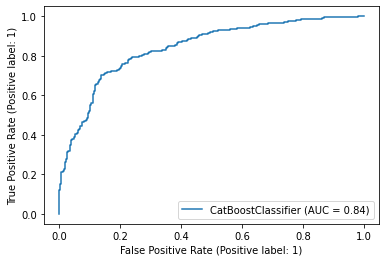

In [14]:
# Roc-кривая
plot_roc_curve(model, X_test, Y_test)

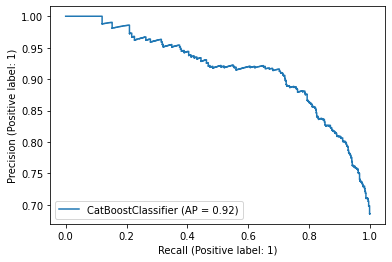

In [15]:
# PRC-кривая и PRC-AUC
PrecisionRecallDisplay.from_estimator(model, X_test, Y_test)

<h2>2. Применить регрессию CatBoostRegressor к набору данных для регрессии.</h2>
Вывести номер итерации и значения метрик (MAE и MSE) для наилучшей итерации. Обратите внимание, что в задаче восстановления регрессии целевая переменная имеет непрерывные значения.

In [16]:
model_cbr = CatBoostRegressor(
    custom_metric=["MAE", "RMSE"], 
    cat_features = cat_features
)

model_cbr.fit(
    X_train, Y_train,
    eval_set=(X_test, Y_test),
    logging_level='Silent'
)

In [17]:
# Лучшие параметры модели
print()
best_it = model_cbr.get_best_iteration()
print('Best iteration: ' + str(best_it))
best_sc = model_cbr.best_score_
print('Best score:'  + str(best_sc))


Best iteration: 366
Best score:{'learn': {'MAE': 0.19214343665544814, 'RMSE': 0.24843906442075847}, 'validation': {'MAE': 0.25643675971245156, 'RMSE': 0.3452023575049784}}


In [18]:
# Метрики качества регрессии
mae_cbr = mean_absolute_error(Y_test, model_cbr.predict(X_test))
msecbr = mean_squared_error(Y_test, model_cbr.predict(X_test))
print('===== Metrics =====')
print('MAE: ', mae_cbr)
print('MSE: ', msecbr)
print('===================')

===== Metrics =====
MAE:  0.2565864159277731
MSE:  0.11916466762699499
